# Text processing with Neural Network 3.31

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# load the data
df = pd.read_csv('3polarity.csv', encoding = 'utf-8')

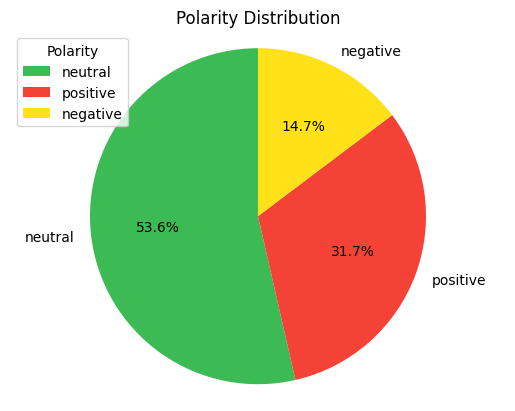

In [2]:

# distribution of polarity
polarity_counts = df['Polarity'].value_counts(normalize=True)

# assign colors for each category
colors = ['#3cba54', '#f44336', '#ffe119']

# Create a pie chart of the polarity distribution
plt.pie(polarity_counts.values, labels=polarity_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Polarity Distribution')
plt.legend(title='Polarity', loc='best')
plt.show()

### understaning the content

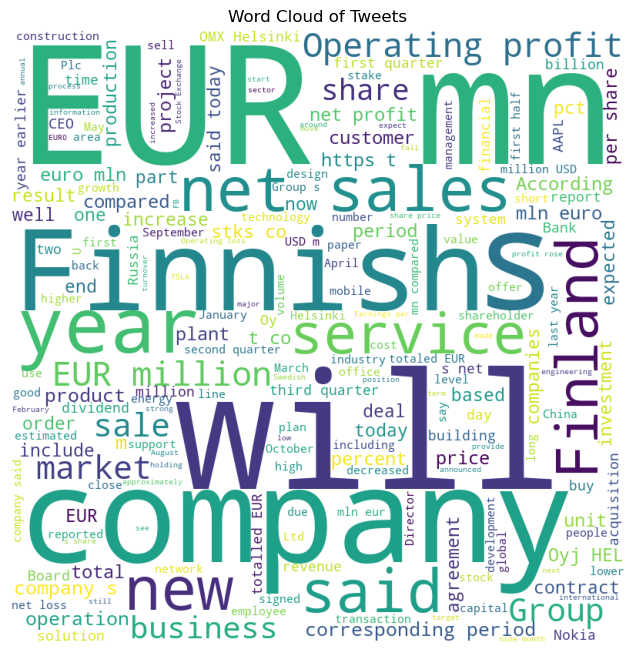

In [5]:
from wordcloud import WordCloud
import pandas as pd

# Join all tweets into a single string
text = ' '.join(df['Tweet'])

# Create a word cloud of the tweets
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

# 1. CNN text

In [2]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    pred = model.predict(X_test)
    pred_classes = np.argmax(pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    print(classification_report(y_test_classes, pred_classes))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)


In [9]:
import numpy as np
from time import time
import pandas as pd
import tensorflow.keras as keras
import tensorflow.keras as keras

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Dropout, Conv1D, MaxPooling1D, Flatten, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split


# preprocess the data
#tokenizer = Tokenizer(num_words=5000, split=' ')

tokenizer = Tokenizer(num_words=5000,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")

tokenizer.fit_on_texts(df['Tweet'].values)
X = tokenizer.texts_to_sequences(df['Tweet'].values)
X = pad_sequences(X)
y = pd.get_dummies(df['Polarity']).values

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def build_cnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Embedding(5000, 128, input_length=input_shape[0])(inputs)
    x = Dropout(0.5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(pool_size=5)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

cnn_model = build_cnn_model(X_train.shape[1:])
start = time()
# train the model
cnn_history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
training_time = time() - start
# evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Training Time:', training_time)
print('Test loss:', loss)
print('Test accuracy:', accuracy)



Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/37 [==============================] - ETA: 0s - loss: 0.9768 - accuracy: 0.5343WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002760BE5BC10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

In [11]:
print_classification_report(cnn_model, X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/37 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.26      0.26      0.26       175
           1       0.71      0.73      0.72       622
           2       0.69      0.68      0.69       372

    accuracy                           0.64

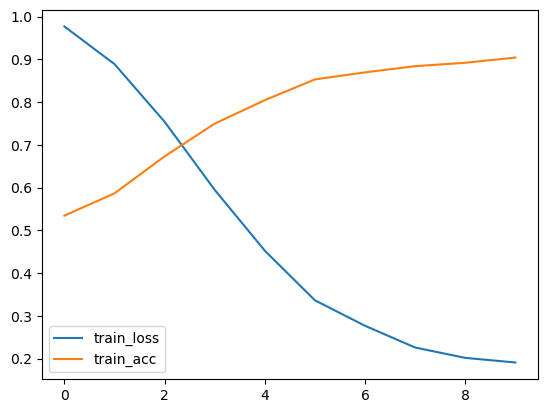

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

plt.plot(cnn_history.history['loss'], label='train_loss')
plt.plot(cnn_history.history['accuracy'], label='train_acc')
plt.legend()
plt.show()

# 2. Simple RNN

In [14]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Embedding, Dropout, SimpleRNN, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

def preprocess_data(df):
    tokenizer = Tokenizer(num_words=5000, split=' ')
    tokenizer.fit_on_texts(df['Tweet'].values)
    X = tokenizer.texts_to_sequences(df['Tweet'].values)
    X = pad_sequences(X)
    y = pd.get_dummies(df['Polarity']).values
    return X, y

def build_rnn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Embedding(5000, 128, input_length=input_shape[0])(inputs)
    x = Dropout(0.5)(x)
    x = SimpleRNN(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_rnn_model(df):
    X, y = preprocess_data(df)
    input_shape = X.shape[1:]
    model = build_rnn_model(input_shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return model, history


In [15]:

rnn_model, rnn_history = train_rnn_model(df)


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/37 [==============================] - ETA: 0s - loss: 0.9998 - accuracy: 0.5142WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002760BFA4A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

In [16]:
print_classification_report(rnn_model, X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
37/37 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.30      0.28      0.29       175
           1       0.72      0.81      0.76       622
           2       0.76      0.63      0.69       372

    accuracy                           0.67

# 3. GRU

In [33]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Embedding, Dropout, GRU, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

def build_gru_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Embedding(5000, 128, input_length=input_shape[0])(inputs)
    x = Dropout(0.5)(x)
    x = GRU(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_gru_model(df):
    X, y = preprocess_data(df)
    input_shape = X.shape[1:]
    model = build_gru_model(input_shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return history


In [45]:
gru_model = build_gru_model(X.shape[1:])
gru_history = train_gru_model(df)


Epoch 1/10
37/37 [==============================] - 10s 169ms/step - loss: 1.0004 - accuracy: 0.5269 - val_loss: 0.9395 - val_accuracy: 0.5321
Epoch 2/10
37/37 [==============================] - 4s 115ms/step - loss: 0.8783 - accuracy: 0.5782 - val_loss: 0.8406 - val_accuracy: 0.6116
Epoch 3/10
37/37 [==============================] - 4s 117ms/step - loss: 0.7378 - accuracy: 0.6786 - val_loss: 0.7949 - val_accuracy: 0.6450
Epoch 4/10
37/37 [==============================] - 6s 175ms/step - loss: 0.6139 - accuracy: 0.7224 - val_loss: 0.8255 - val_accuracy: 0.6501
Epoch 5/10
37/37 [==============================] - 5s 130ms/step - loss: 0.4778 - accuracy: 0.7832 - val_loss: 0.8123 - val_accuracy: 0.6689
Epoch 6/10
37/37 [==============================] - 4s 122ms/step - loss: 0.3748 - accuracy: 0.8386 - val_loss: 0.9470 - val_accuracy: 0.6972
Epoch 7/10
37/37 [==============================] - 6s 159ms/step - loss: 0.3136 - accuracy: 0.8603 - val_loss: 0.9327 - val_accuracy: 0.6681
Epoch

# 4. LSTM

In [23]:
from keras.layers import LSTM
from keras.layers import Input, Conv1D, MaxPooling1D, Bidirectional, LSTM, concatenate, Dense, GlobalAveragePooling1D, GlobalMaxPooling1D

def build_lstm_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Embedding(5000, 128, input_length=input_shape[0])(inputs)
    x = Dropout(0.5)(x)
    x = LSTM(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_lstm_model(df):
    X, y = preprocess_data(df)
    input_shape = X.shape[1:]
    model = build_lstm_model(input_shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)
    return model, history


In [49]:
# Train
lstm_model,lstm_history = train_lstm_model(df)

Epoch 1/10
37/37 [==============================] - 7s 159ms/step - loss: 0.9951 - accuracy: 0.5299 - val_loss: 0.9254 - val_accuracy: 0.5321
Epoch 2/10
37/37 [==============================] - 5s 141ms/step - loss: 0.8777 - accuracy: 0.5418 - val_loss: 0.8506 - val_accuracy: 0.5817
Epoch 3/10
37/37 [==============================] - 6s 159ms/step - loss: 0.7685 - accuracy: 0.6497 - val_loss: 0.8742 - val_accuracy: 0.6433
Epoch 4/10
37/37 [==============================] - 6s 166ms/step - loss: 18.0069 - accuracy: 0.7085 - val_loss: 1.2396 - val_accuracy: 0.6647
Epoch 5/10
37/37 [==============================] - 6s 172ms/step - loss: 583.4564 - accuracy: 0.7441 - val_loss: 1.4680 - val_accuracy: 0.6219
Epoch 6/10
37/37 [==============================] - 6s 168ms/step - loss: 50.8133 - accuracy: 0.6908 - val_loss: 0.8691 - val_accuracy: 0.6433
Epoch 7/10
37/37 [==============================] - 5s 148ms/step - loss: 0.8710 - accuracy: 0.7565 - val_loss: 0.7842 - val_accuracy: 0.6681
Ep

In [17]:
# Report
print_classification_report(lstm_model, X_test, y_test)

37/37 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

           0       0.43      0.27      0.33       175
           1       0.66      0.89      0.76       622
           2       0.83      0.49      0.62       372

    accuracy                           0.67      1169
   macro avg       0.64      0.55      0.57      1169
weighted avg       0.68      0.67      0.65      1169



In [25]:
def plot_hist(history, title):
    """
    Vars:
    - history: A Keras History object representing the training history of a model.
    """
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 4))
    
    ax1.plot(history.history['accuracy'], c= 'b')
    ax1.plot(history.history['val_accuracy'], c='r')
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Val'], loc='upper left')

    ax2.plot(history.history['loss'], c='m')
    ax2.plot(history.history['val_loss'], c='c')
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Val'], loc='upper left')
     # Add a title to the entire image
    fig.suptitle(title, fontsize=14)
    plt.show()

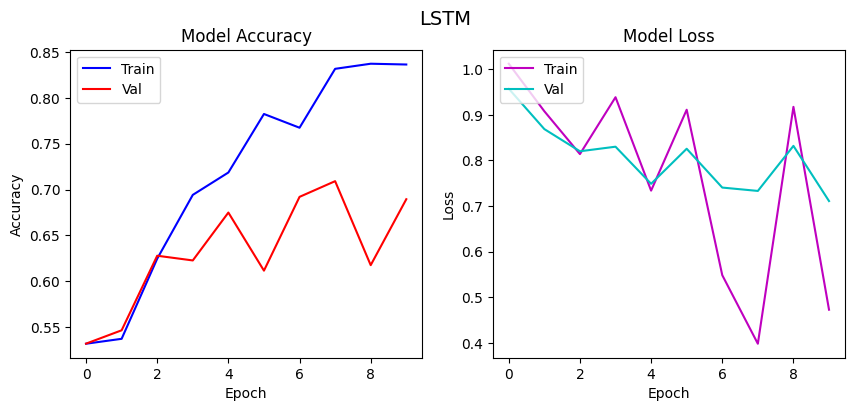

In [26]:
plot_hist(lstm_history,'LSTM')
#plot_hist(gru_history,'GRU')

# REPORT

In [30]:


print_classification_report(lstm_model, X_test, y_test)
#print(report)

37/37 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.50      0.23      0.31       175
           1       0.69      0.85      0.76       622
           2       0.73      0.64      0.68       372

    accuracy                           0.69      1169
   macro avg       0.64      0.57      0.59      1169
weighted avg       0.68      0.69      0.67      1169

Test loss: 0.7108460664749146
Test accuracy: 0.6894781589508057


In [61]:
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(model, X_test, y_test):
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    import matplotlib.pyplot as plt

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    #  each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(y_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and AUC
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = roc_auc_score(y_test, y_pred, average="micro")

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             linewidth=2)

    for i in range(y_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                                       ''.format(i, roc_auc[i]),
                 linewidth=2)

    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


37/37 [==============================] - 0s 11ms/step


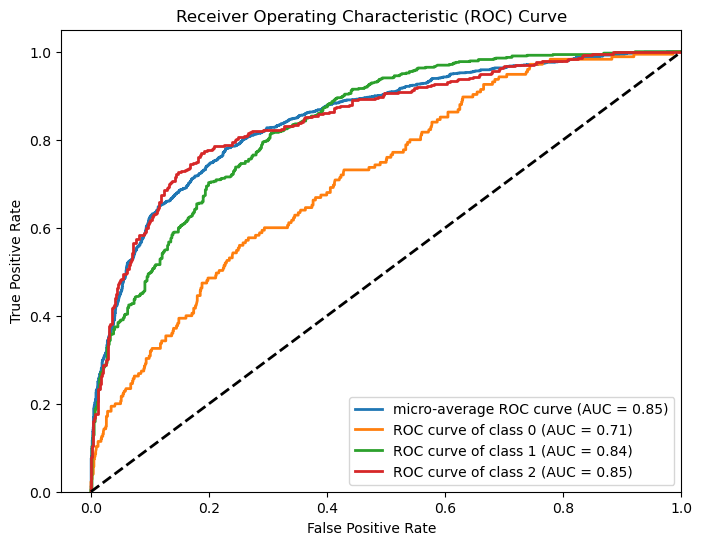

In [75]:
plot_roc_curve(lstm_model, X_test, y_test)
